In [1]:
# Student Mark predictor - Eaaa, Autumn 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('StudentGrades.csv')

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


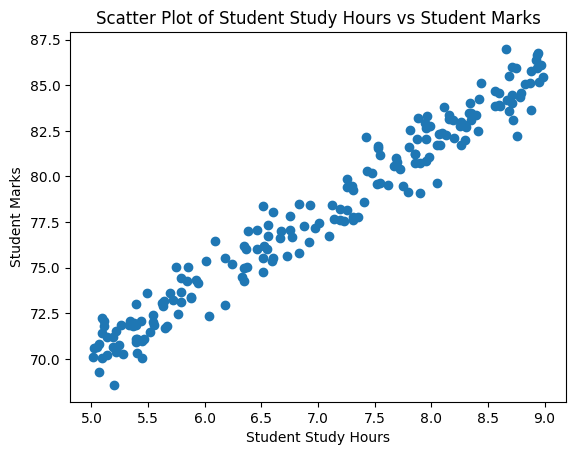

In [7]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter Plot of Student Study Hours vs Student Marks")
plt.show()

In [8]:
# Remove empty cells

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df2 = df.fillna(df.mean())

In [11]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [13]:
# Split the dataset

In [14]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51 )
print ("Shape of X_train = ", X_train.shape)
print ("Shape of y_train = ", y_train.shape)
print ("Shape of X_test = ", X_test.shape)
print ("Shape of y_test = ", y_test.shape)

Shape of X_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of X_test =  (40, 1)
Shape of y_test =  (40, 1)


In [16]:
# y = m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train , y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

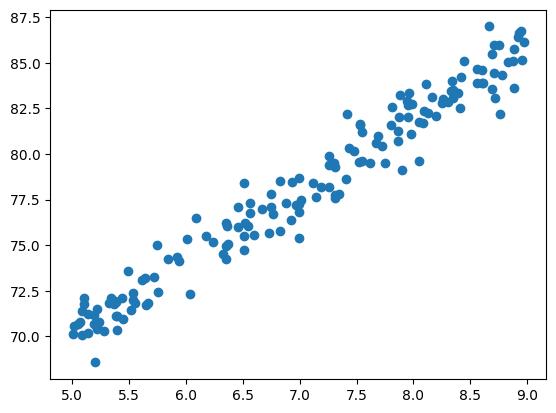

In [19]:
plt.scatter(X_train,y_train)

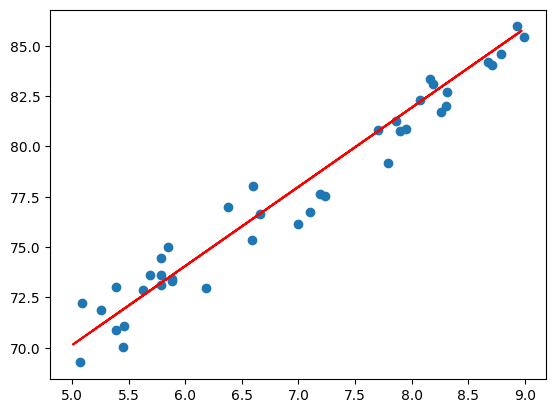

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = "r" )

[[ 6.89970536 77.39181818]
 [ 5.43555556 71.74444444]
 [ 8.30316667 83.39133333]]
[1 2 2 2 2 0 0 1 0 0 2 1 0 0 1 2 0 1 0 2 1 1 0 0 0 2 1 0 0 1 2 0 0 2 2 0 0
 1 0 1 2 0 2 2 1 2 2 0 0 0 1 1 0 0 1 0 0 2 0 2 2 1 1 0 2 1 2 2 0 2 2 1 2 2
 2 0 0 1 0 0 0 0 1 2 0 0 0 0 1 2 1 2 1 1 0 2 1 0 2 2 0 0 2 1 2 2 1 1 1 1 2
 1 2 0 0 1 2 1 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 1 1 1 0 2 0 2 1 1 1 1 0 2 0 1
 2 1 0 2 0 1 0 0 2 0 2 2]


Text(0.5, 1.0, 'K Mean Classification')

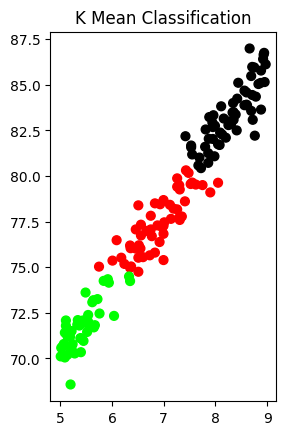

In [26]:

from sklearn.cluster import KMeans  # This will be used for the algorithm
x = pd.DataFrame(np.column_stack((X_train, y_train)), columns=['student_marks', 'study_hours']) 
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

# the random state is optionlly, here it is specified so we get determistic clusters.
# this will contain the labels for our predicted clusters (either 0 or 1)
labels = kmeans.labels_
# the centers of the calculated clusters
clusters = kmeans.cluster_centers_
# printing our cluster centers - there will be 2 of them.
print(clusters)
print(labels)
x.columns

colormap = np.array(['red', 'lime', 'black', 'blue', 'yellow', 'green', 'red'])
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.student_marks, x.study_hours, c=colormap[labels], s=40)
plt.title('K Mean Classification')